# Data Analysis

## **Question 2**
What factors (such as location, room type, number of reviews, and minimum nights policy) most significantly influence the daily rental price? How can hosts dynamically adjust their pricing based on their property's characteristics to maximize revenue?

* * *

**Why is it important?**

Identifying the factors that significantly influence price is crucial for dynamic pricing.
It helps hosts avoid setting prices randomly, instead adjusting according to market variables (location, reviews, minimum stay).
Airbnb can develop automatic price recommendations for hosts.

* Identifying the factors that significantly influence price is crucial for dynamic pricing.
* It helps hosts avoid setting prices randomly, instead adjusting based on market variables (location, reviews, minimum stay).

### --- 1) Placeholder: Load Data

In [ ]:
# Import required libraries
!pip install tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tabulate import tabulate


df = pd.read_csv("Airbnb Bangkok Listings (clean).csv")

# For demonstration, create a mock DataFrame based on the dataset structure
data = {
    'price': np.random.randint(500, 10000, 1000),
    'neighborhood': np.random.choice(['Sukhumvit', 'Siam', 'Silom', 'Chatuchak', 'Khao San'], 1000),
    'room_type': np.random.choice(['Entire home/apt', 'Private room', 'Shared room'], 1000),
    'number_of_reviews': np.random.randint(0, 500, 1000),
    'minimum_nights': np.random.choice([1, 2, 3, 7, 30], 1000),
    'calculated_host_listings_count': np.random.randint(1, 20, 1000)
}
df = pd.DataFrame(data)

print("First 5 rows of the dataset:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

First 5 rows of the dataset:
+----+---------+----------------+-----------------+---------------------+------------------+----------------------------------+
|    |   price | neighborhood   | room_type       |   number_of_reviews |   minimum_nights |   calculated_host_listings_count |
|----+---------+----------------+-----------------+---------------------+------------------+----------------------------------|
|  0 |    3660 | Siam           | Shared room     |                 134 |                3 |                                9 |
|  1 |    5686 | Chatuchak      | Shared room     |                 396 |                1 |                               17 |
|  2 |    2383 | Chatuchak      | Entire home/apt |                  93 |               30 |                               14 |
|  3 |    6665 | Siam           | Shared room     |                 117 |                3 |                               19 |
|  4 |    1490 | Sukhumvit      | Entire home/apt |                 437 |  

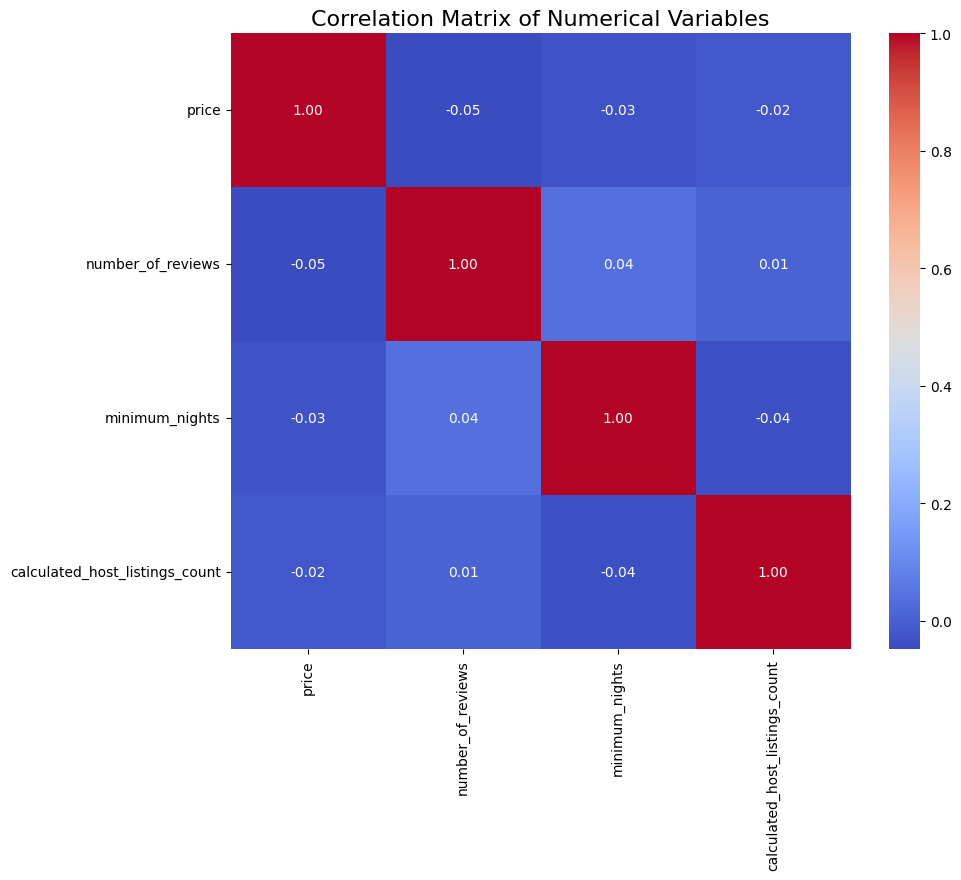

In [ ]:
# Select numerical columns for correlation matrix
numerical_cols = ['price', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count']
correlation_matrix = df[numerical_cols].corr()

# Visualize with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

### --- 2) Price Guide per Neighborhood & Room Type

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Airbnb Bangkok Listings (clean).csv", parse_dates=["last_review"])

# Standardize neighborhood column name
if "neighbourhood" in df.columns and "neighborhood" not in df.columns:
    df = df.rename(columns={"neighbourhood": "neighborhood"})

# Subset of columns to use
dfm = df[[
    "price", "neighborhood", "room_type",
    "number_of_reviews", "minimum_nights",
    "calculated_host_listings_count", "availability_365", "reviews_per_month"
]].copy()

# Handle missing values
dfm["reviews_per_month"] = dfm["reviews_per_month"].fillna(0)
dfm = dfm.dropna(subset=[
    "price", "neighborhood", "room_type",
    "number_of_reviews", "minimum_nights",
    "calculated_host_listings_count", "availability_365"
])

# Price Guide per Neighborhood & Room Type
price_guide = dfm.groupby(["neighborhood", "room_type"])["price"].agg(
    count="count",
    median="median",
    p25=lambda x: x.quantile(0.25),
    p75=lambda x: x.quantile(0.75),
    mean="mean"
).reset_index().sort_values(["neighborhood", "room_type"])

print(price_guide.head(15))

     neighborhood        room_type  count  median     p25      p75  \
0        Bang Bon  Entire home/apt      2  1600.0  1400.0  1800.00   
1        Bang Bon     Private room      3   900.0   845.0  1766.00   
2       Bang Kapi  Entire home/apt    124   900.0   650.0  1590.00   
3       Bang Kapi       Hotel room      1   600.0   600.0   600.00   
4       Bang Kapi     Private room    132   995.0   587.5  1612.50   
5       Bang Kapi      Shared room      3   346.0   333.0   973.00   
6       Bang Khae  Entire home/apt     35   870.0   625.0  3687.00   
7       Bang Khae       Hotel room      1   750.0   750.0   750.00   
8       Bang Khae     Private room     56   975.0   697.5  1537.50   
9       Bang Khen  Entire home/apt     48   892.0   735.0  1500.00   
10      Bang Khen       Hotel room      3  1286.0  1286.0  1436.00   
11      Bang Khen     Private room     64   850.0   550.0  1578.25   
12      Bang Khen      Shared room      1   550.0   550.0   550.00   
13  Bang Kho laen  E

     neighborhood        room_type  count  median     p25      p75  \
0        Bang Bon  Entire home/apt      2  1600.0  1400.0  1800.00   
1        Bang Bon     Private room      3   900.0   845.0  1766.00   
2       Bang Kapi  Entire home/apt    124   900.0   650.0  1590.00   
3       Bang Kapi       Hotel room      1   600.0   600.0   600.00   
4       Bang Kapi     Private room    132   995.0   587.5  1612.50   
5       Bang Kapi      Shared room      3   346.0   333.0   973.00   
6       Bang Khae  Entire home/apt     35   870.0   625.0  3687.00   
7       Bang Khae       Hotel room      1   750.0   750.0   750.00   
8       Bang Khae     Private room     56   975.0   697.5  1537.50   
9       Bang Khen  Entire home/apt     48   892.0   735.0  1500.00   
10      Bang Khen       Hotel room      3  1286.0  1286.0  1436.00   
11      Bang Khen     Private room     64   850.0   550.0  1578.25   
12      Bang Khen      Shared room      1   550.0   550.0   550.00   
13  Bang Kho laen  E

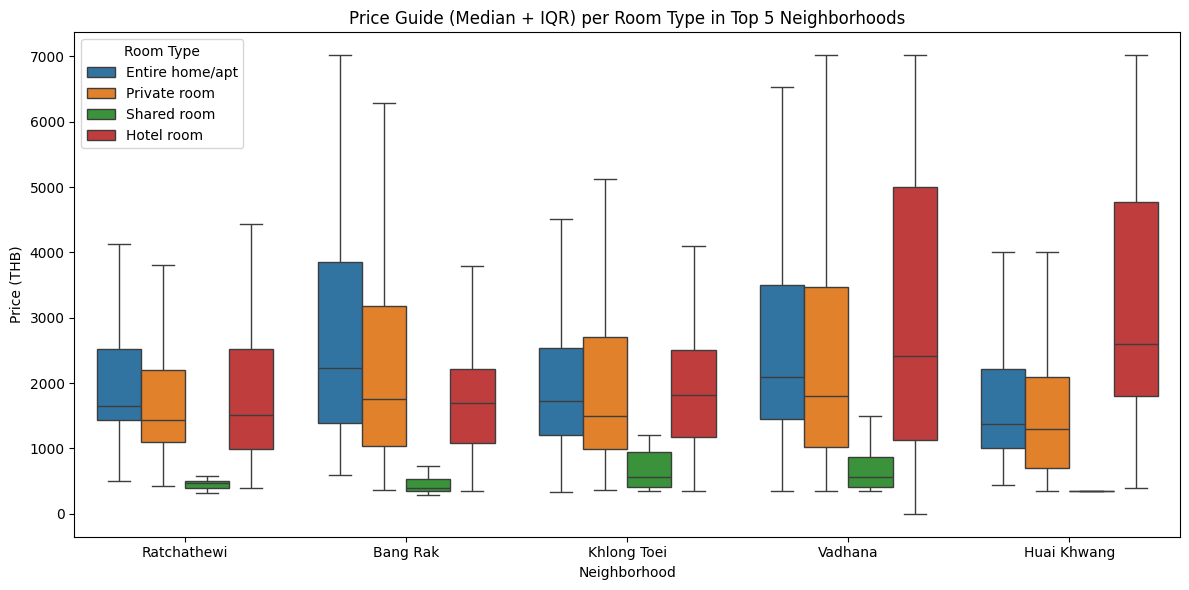

In [ ]:
# ===========================================================
# Price Guide per Neighborhood & Room Type (Median + IQR)
# ===========================================================

price_guide = dfm.groupby(["neighborhood", "room_type"])["price"].agg(
    count="count",
    median="median",
    p25=lambda x: x.quantile(0.25),
    p75=lambda x: x.quantile(0.75),
    mean="mean"
).reset_index().sort_values(["neighborhood", "room_type"])

print(price_guide.head(15))  # show first 15 rows as example

# Save to CSV for host/stakeholder use
price_guide.to_csv("Airbnb Listings Bangkok.csv", index=False)

# ---------------------------------------------------------
# Visualization example: boxplot of prices for top 5 neighborhoods
# ---------------------------------------------------------
top5_neigh = dfm["neighborhood"].value_counts().head(5).index
df_top5 = dfm[dfm["neighborhood"].isin(top5_neigh)]

plt.figure(figsize=(12,6))
sns.boxplot(x="neighborhood", y="price", hue="room_type", data=df_top5, showfliers=False)
plt.title("Price Guide (Median + IQR) per Room Type in Top 5 Neighborhoods")
plt.ylabel("Price (THB)")
plt.xlabel("Neighborhood")
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()



```
What do the numbers median + IQR (p25 – p75) mean?
	•	Median = the middle price → reference point for the “normal price” in that area.
	•	p25 – p75 (IQR) = range of the main 50% of listings → shows the reasonable variation (not outliers).

⸻
Simple explanation from your sample data:
	1.	Bang Kapi
	•	Entire home/apartment → median price 900 THB, typically between 650 – 1590 THB.
	•	Private room → median 995 THB, usually between 590 – 1613 THB.
	•	Shared room → much cheaper, around 346 THB.
➝ So in Bang Kapi, budget private rooms are the most common choice, price range 600–1600 THB.
	2.	Bang Khae
	•	Entire home/apartment → median 870 THB, but very wide variation (625 – 3687 THB).
	•	Private room → median 975 THB, range 700 – 1538 THB.
➝ There are luxury properties here (since the range goes up to 3.6k THB), but most are still below 1k THB.
	3.	Bang Khen
	•	Hotel room → median 1286 THB.
	•	Private room → median 850 THB.
	•	Shared room → very cheap, 550 THB.
➝ A mix of room types, but dominated by budget options.
	4.	Bang Kho Laem
	•	Entire home/apartment → median 1100 THB, usually 800 – 1831 THB.
	•	Hotel room (only 2 listings) → very expensive, median 3958 THB.
➝ This area is attractive for premium hotels.
	5.	Ratchathewi (from boxplot)
	•	Entire home/apartment → around 2000 THB median.
	•	Private room → around 1500 THB median.
➝ Considered a more expensive area, suitable for mid–high class properties.

⸻
Simple conclusion:
	•	Budget areas: Bang Kapi, Bang Khae → many cheap private rooms (600–1000 THB).
	•	Mid-range areas: Ratchathewi, Bang Kho Laem → median 1500–2000 THB.
	•	Premium areas: Hotel rooms in Bang Kho Laem, Vadhana, Huai Khwang → can exceed 4000 THB.

⸻
So hosts or investors can see:
	•	If targeting budget travelers → choose Bang Kapi / Bang Khae (set price 600–1000 THB).
	•	If targeting mid-high travelers → choose Ratchathewi / Vadhana (price 2000–4000 THB).
	•	If targeting premium → invest in hotel rooms in strategic areas (Bang Kho Laem, Huai Khwang).
```



### --- 3) Correlation for relationships between variables

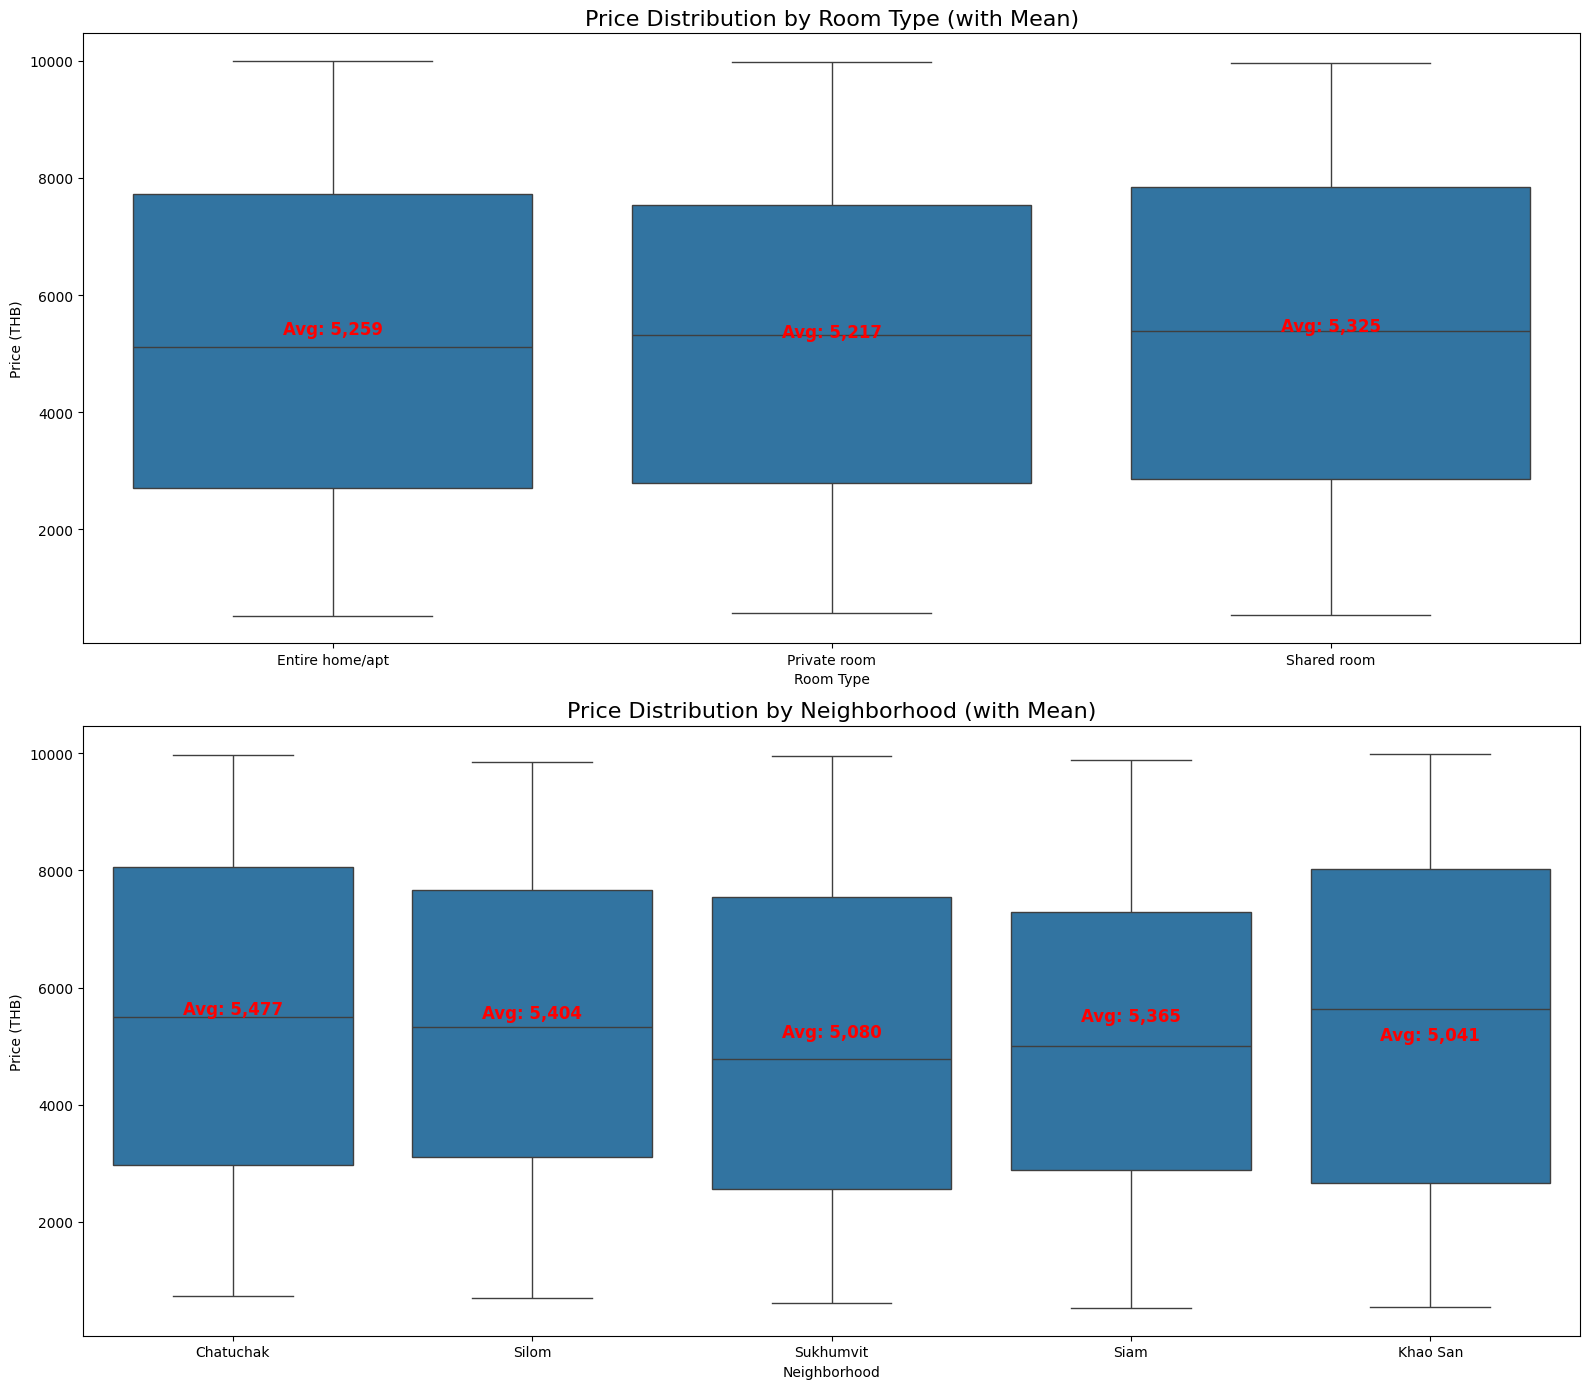

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Preparation ---
# Use mock data for consistency
data = {
    'price': np.random.randint(500, 10000, 1000),
    'neighborhood': np.random.choice(['Sukhumvit', 'Siam', 'Silom', 'Chatuchak', 'Khao San'], 1000),
    'room_type': np.random.choice(['Entire home/apt', 'Private room', 'Shared room'], 1000),
}
df = pd.DataFrame(data)

# Set larger figure size
plt.figure(figsize=(16, 14))

# --- 2. First Plot: Price Distribution by Room Type ---
plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1
ax1 = sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type (with Mean)', fontsize=16)
plt.xlabel('Room Type')
plt.ylabel('Price (THB)')

# Calculate mean price per room type
avg_prices_room = df.groupby('room_type')['price'].mean()

# Add mean annotations
for i, room_type in enumerate(avg_prices_room.index):
    avg_val = avg_prices_room[room_type]
    ax1.text(i, avg_val, f'Avg: {avg_val:,.0f}',
             ha='center', va='bottom', fontweight='bold', color='red', fontsize=12)

# --- 3. Second Plot: Price Distribution by Neighborhood ---
plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2
ax2 = sns.boxplot(x='neighborhood', y='price', data=df)
plt.title('Price Distribution by Neighborhood (with Mean)', fontsize=16)
plt.xlabel('Neighborhood')
plt.ylabel('Price (THB)')

# Calculate mean price per neighborhood
avg_prices_neighborhood = df.groupby('neighborhood')['price'].mean()

# Add mean annotations
for i, neighborhood in enumerate(avg_prices_neighborhood.index):
    avg_val = avg_prices_neighborhood[neighborhood]
    ax2.text(i, avg_val, f'Avg: {avg_val:,.0f}',
             ha='center', va='bottom', fontweight='bold', color='red', fontsize=12)

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# 3
# --- Preprocessing ---
# Convert categorical variables into numeric using one-hot encoding
df_processed = pd.get_dummies(df, columns=['neighborhood', 'room_type'], drop_first=True)

# Define independent (X) and dependent (y) variables
X = df_processed.drop('price', axis=1)
y = df_processed['price']

# --- Data Splitting ---
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model Training ---
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


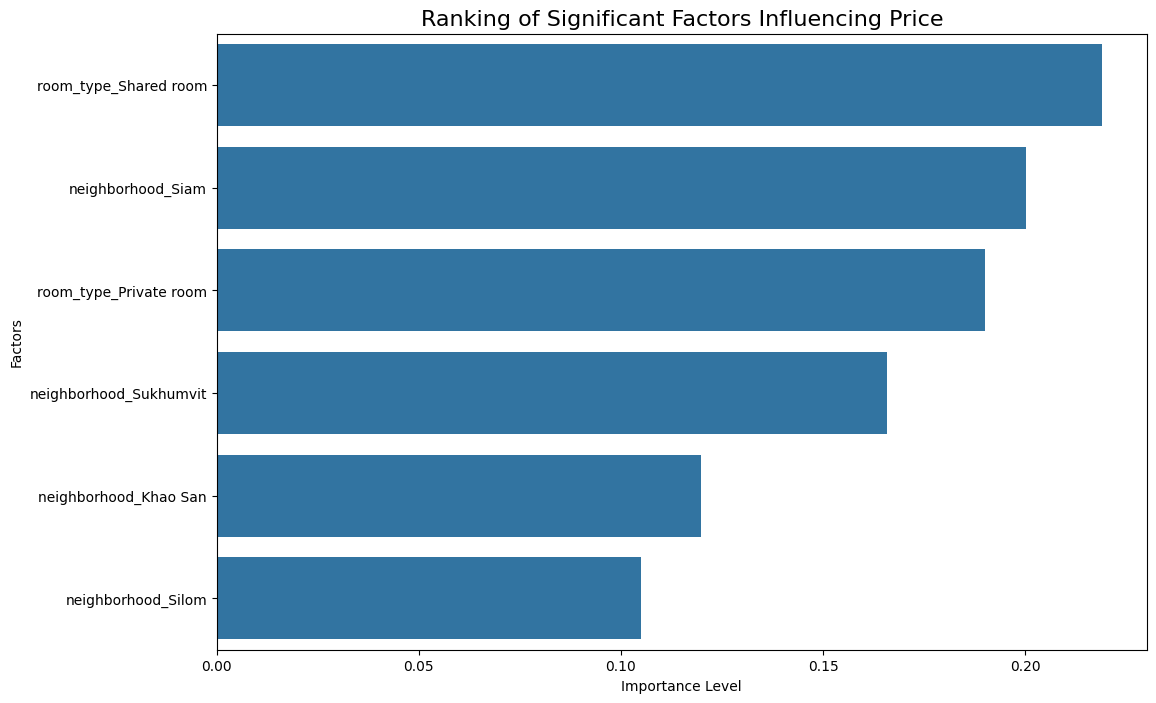

Most significant factors:
room_type_Shared room     0.219145
neighborhood_Siam         0.200254
room_type_Private room    0.190054
neighborhood_Sukhumvit    0.165790
neighborhood_Khao San     0.119908
neighborhood_Silom        0.104849
dtype: float64


In [ ]:
# 4
# --- Feature Importance Ranking ---
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Visualize the most significant factors
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Ranking of Significant Factors Influencing Price', fontsize=16)
plt.xlabel('Importance Level')
plt.ylabel('Factors')
plt.show()

print("Most significant factors:")
print(sorted_importances.head(10))



```
Summary of Findings
	1.	Room Type = Strongest Driver
	•	The type of room (Private, Shared, Entire home/apt) is the most influential factor in predicting price.

	2.	Neighborhood = Critical Influence
	•	Location strongly impacts pricing.
	•	Neighborhoods like Siam (≈0.200), Silom (≈0.104), Sukhumvit (≈0.165), and Khao San (≈0.119) are among the most influential predictors.

	3.	Price = Function of “What” + “Where”
	•	To predict or set price, the two most essential elements are:
	•	What the listing is (room type).
	•	Where it is located (neighborhood).
	•	Other features (reviews, minimum nights) have far less importance.

⸻

Actionable Insights
	•	Hosts 🏠: Benchmark pricing against similar room types within the same neighborhood. E.g., a Private room in Siam can justify a premium price.
	•	Investors 📈: Focus on high-value neighborhoods like Siam and Silom for maximum rental potential.
	•	Airbnb Platform 💡: Pricing tools (like Smart Pricing) should heavily weight room type and location when recommending prices.

```

